In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import re

In [103]:
# Directory paths
train_dir = "aclImdb_v1/aclImdb/train"
test_dir = "aclImdb_v1/aclImdb/test"

# Read and preprocess the movie reviews
def read_reviews(directory):
    reviews = []
    ratings = []
    for label in ["pos", "neg"]:
        label_dir = os.path.join(directory, label)
        for filename in os.listdir(label_dir):
            with open(os.path.join(label_dir, filename), "r") as file:
                try:
                    review = file.read()
                except UnicodeDecodeError:
                    with open(os.path.join(label_dir, filename), "r", encoding="latin-1") as file:
                        review = file.read()
                rating = int(filename.split("_")[1].split(".")[0])
                reviews.append(review)
                ratings.append(rating)
    return reviews, ratings

# Read training and testing data
train_reviews, train_ratings = read_reviews(train_dir)
test_reviews, test_ratings = read_reviews(test_dir)

### Reviews per rating plot

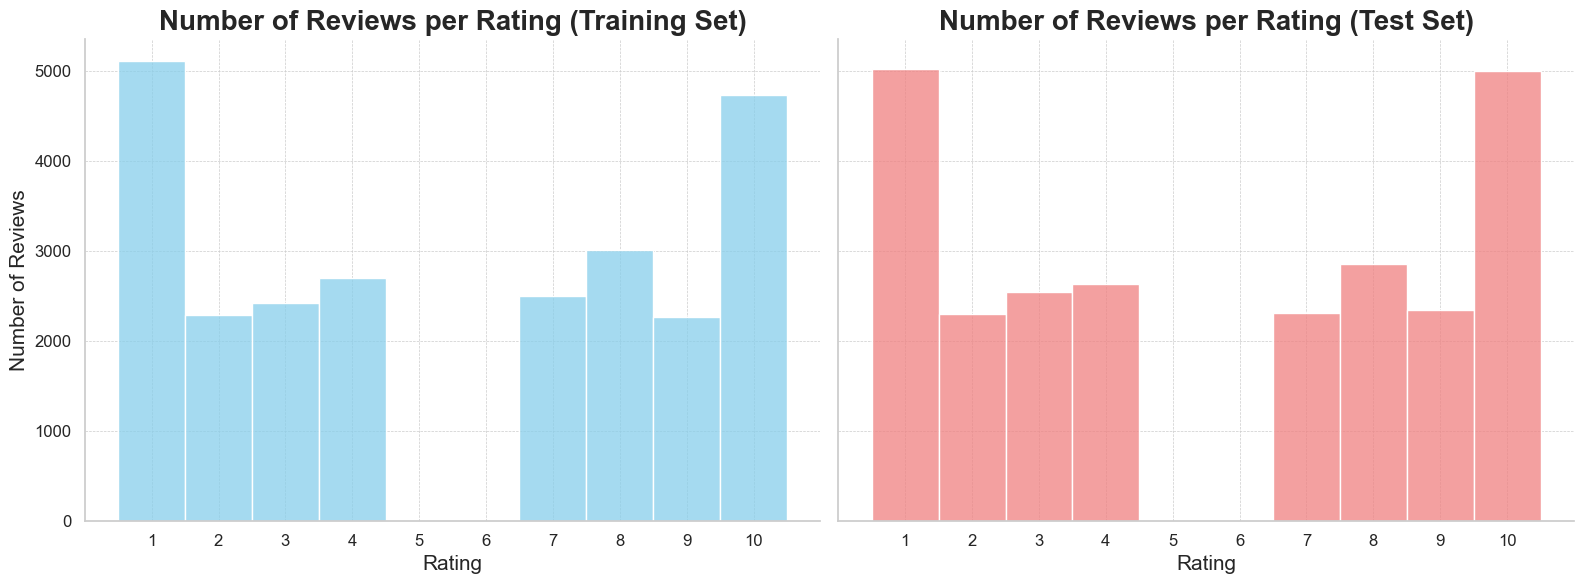

In [118]:
# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Customize Seaborn style
sns.set(style="whitegrid")

# Histogram of Number of Reviews per Rating (1-10) for Training Set
sns.histplot(train_ratings, bins=np.arange(0.5, 11.5, 1), kde=False, ax=axes[0], color='skyblue')
axes[0].set_title('Number of Reviews per Rating (Training Set)', fontsize=20, fontweight='bold')
axes[0].set_xlabel('Rating', fontsize=15)
axes[0].set_ylabel('Number of Reviews', fontsize=15)
axes[0].set_xticks(np.arange(1, 11, 1))
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(ax=axes[0])

# Histogram of Number of Reviews per Rating (1-10) for Test Set
sns.histplot(test_ratings, bins=np.arange(0.5, 11.5, 1), kde=False, ax=axes[1], color='lightcoral')
axes[1].set_title('Number of Reviews per Rating (Test Set)', fontsize=20, fontweight='bold')
axes[1].set_xlabel('Rating', fontsize=15)
axes[1].set_ylabel('Number of Reviews', fontsize=15)
axes[1].set_xticks(np.arange(1, 11, 1))
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

### Average length of reviews

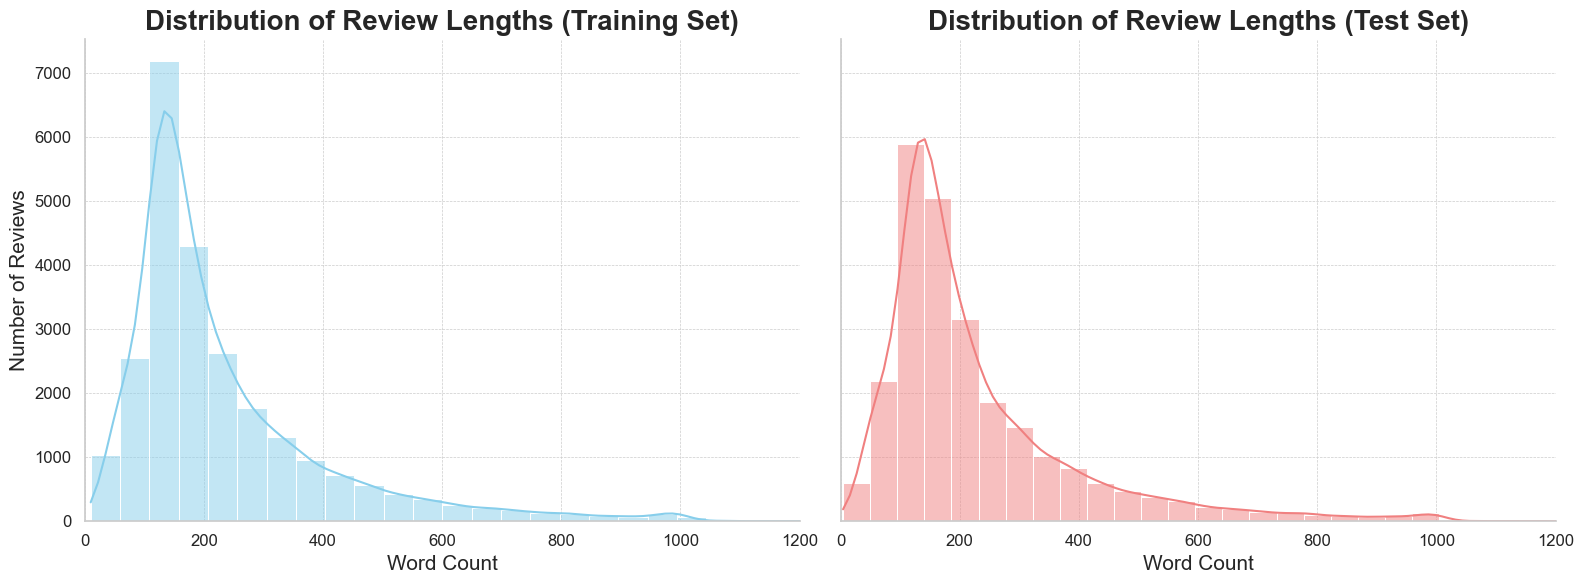

In [120]:
# Calculate the length of each review (in words)
train_review_lengths = [len(review.split()) for review in train_reviews]
test_review_lengths = [len(review.split()) for review in test_reviews]

# Create side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Customize Seaborn style
sns.set(style="whitegrid")

# Plot of the Distribution of Review Lengths for Training Set
sns.histplot(train_review_lengths, bins=50, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Review Lengths (Training Set)', fontsize=20, fontweight='bold')
axes[0].set_xlabel('Word Count', fontsize=15)
axes[0].set_ylabel('Number of Reviews', fontsize=15)
axes[0].tick_params(axis='x', labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].set_xlim(0, 1200)
axes[0].grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(ax=axes[0])

# Plot of the Distribution of Review Lengths for Test Set
sns.histplot(test_review_lengths, bins=50, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Review Lengths (Test Set)', fontsize=20, fontweight='bold')
axes[1].set_xlabel('Word Count', fontsize=15)
axes[1].set_ylabel('Number of Reviews', fontsize=15)
axes[1].tick_params(axis='x', labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].set_xlim(0, 1200)
axes[1].grid(True, which='both', linestyle='--', linewidth=0.5)
sns.despine(ax=axes[1])

plt.tight_layout()
plt.show()

### Most frequent words

In [111]:
vectorizer = CountVectorizer()
# Transform data into a document-term matrix
X_train = vectorizer.fit_transform(train_reviews)
X_test = vectorizer.transform(test_reviews)

# Get the vocabulary (words) and their respective indices
vocab = vectorizer.get_feature_names_out()

# Create a dictionary of words and their counts for training set
train_word_counts = X_train.sum(axis=0).A1
test_word_counts = X_test.sum(axis=0).A1
train_word_count_dict = dict(zip(vocab, train_word_counts))
test_word_count_dict = dict(zip(vocab, test_word_counts))

# Sort the dictionary by count in descending order to find the most frequent words
sorted_train_word_count = sorted(train_word_count_dict.items(), key=lambda item: item[1], reverse=True)
sorted_test_word_count = sorted(test_word_count_dict.items(), key=lambda item: item[1], reverse=True)

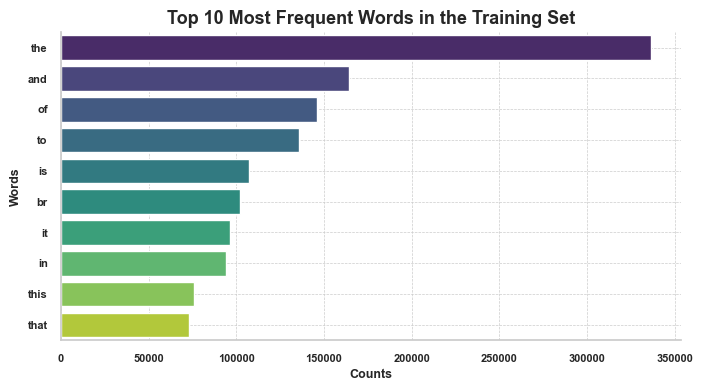

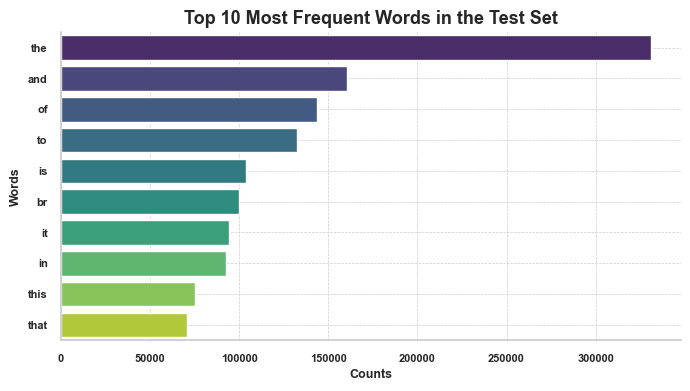

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the top 10 most frequent words
top_train_words = sorted_train_word_count[:10]
train_words, train_counts = zip(*top_train_words)
top_test_words = sorted_test_word_count[:10]
test_words, test_counts = zip(*top_test_words)

# Function to plot bar chart
def plot_word_counts(words, counts, title):
    plt.figure(figsize=(8, 4))
    sns.set(style="whitegrid")
    sns.barplot(x=list(counts), y=list(words), palette="viridis")
    plt.title(title, fontsize=13, fontweight='bold')
    plt.xlabel('Counts', fontsize=9, fontweight='bold')
    plt.ylabel('Words', fontsize=9, fontweight='bold')
    plt.xticks(fontsize=8,fontweight='bold')
    plt.yticks(fontsize=8, fontweight='bold')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    sns.despine()
    plt.show()

# Plot the top 10 most frequent words
plot_word_counts(train_words, train_counts, 'Top 10 Most Frequent Words in the Training Set')
plot_word_counts(test_words, test_counts, 'Top 10 Most Frequent Words in the Test Set')

### Removing filler words and comparing low vs. high rating reviews

In [135]:
# Extract the top 80 most frequent words to decide which one are fillers
top_train_words = sorted_train_word_count[:80]
train_words, train_counts = zip(*top_train_words)
print(train_words)
fill_words = ['the', 'and', 'of', 'to', 'is', 'br', 'it', 'in', 'this', 'that', 'was', 'as', 
              'for', 'with', 'movie', 'but', 'film', 'you', 'on', 'he', 'are', 'his', 'have',
              'be', 'one', 'at', 'they', 'by', 'an', 'who', 'so', 'from', 'there', 'her', 'or', 
              'about', 'out', 'if', 'has', 'what', 'some', 'can', 'she', 'when', 'even', 'my', 
              'would', 'which', 'story', 'see', 'their', 'had', 'we', 'were', 'me', 'than', 
              'much', 'get', 'been', 'people', 'will', 'do', 'other', 'also', 'up', 'into', 'first',
              'all', 'no', 'just', 'how', 'because', 'then']
fill_words_set = set(fill_words)

('the', 'and', 'of', 'to', 'is', 'br', 'it', 'in', 'this', 'that', 'was', 'as', 'for', 'with', 'movie', 'but', 'film', 'you', 'on', 'not', 'he', 'are', 'his', 'have', 'be', 'one', 'all', 'at', 'they', 'by', 'an', 'who', 'so', 'from', 'like', 'there', 'her', 'or', 'just', 'about', 'out', 'if', 'has', 'what', 'some', 'good', 'can', 'more', 'she', 'when', 'very', 'up', 'time', 'no', 'even', 'my', 'would', 'which', 'story', 'only', 'really', 'see', 'their', 'had', 'we', 'were', 'me', 'well', 'than', 'much', 'get', 'bad', 'been', 'people', 'will', 'do', 'other', 'also', 'into', 'first')


In [114]:
# Normalize ratings and filter reviews with ratings under 3 stars
threshold = 2
low_rating_reviews = [review for review, rating in zip(train_reviews, train_ratings) if rating <= threshold]

# Remove the fill words
vectorizer = CountVectorizer(stop_words=fill_words)

# Get word count on the low-rating reviews
X_low_rating = vectorizer.fit_transform(low_rating_reviews)
vocab = vectorizer.get_feature_names_out()
low_rating_word_counts = X_low_rating.sum(axis=0).A1
low_rating_word_count_dict = dict(zip(vocab, low_rating_word_counts))
sorted_low_rating_word_count = sorted(low_rating_word_count_dict.items(), key=lambda item: item[1], reverse=True)

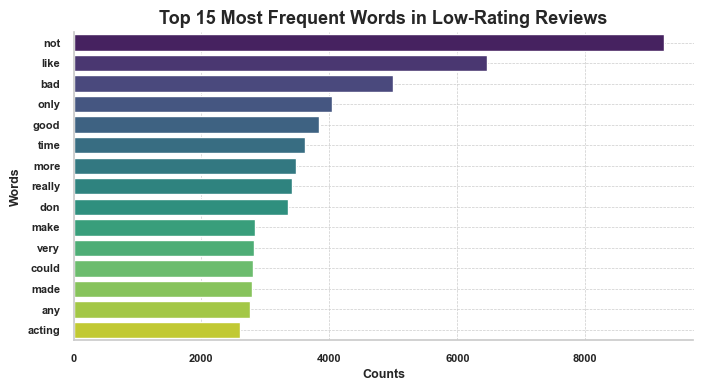

In [115]:
# Extract the top 15 most frequent words and their counts
top_low_rating_words = sorted_low_rating_word_count[:15]
low_rating_words, low_rating_counts = zip(*top_low_rating_words)
plot_word_counts(low_rating_words, low_rating_counts, 'Top 15 Most Frequent Words in Low-Rating Reviews')

In [116]:
threshold = 8
high_rating_reviews = [review for review, rating in zip(train_reviews, train_ratings) if rating > threshold]

# Remove the fill words
vectorizer = CountVectorizer(stop_words=fill_words)

# Get word count on the high-rating reviews
X_high_rating = vectorizer.fit_transform(high_rating_reviews)
vocab = vectorizer.get_feature_names_out()
high_rating_word_counts = X_high_rating.sum(axis=0).A1
high_rating_word_count_dict = dict(zip(vocab, high_rating_word_counts))
sorted_high_rating_word_count = sorted(high_rating_word_count_dict.items(), key=lambda item: item[1], reverse=True)

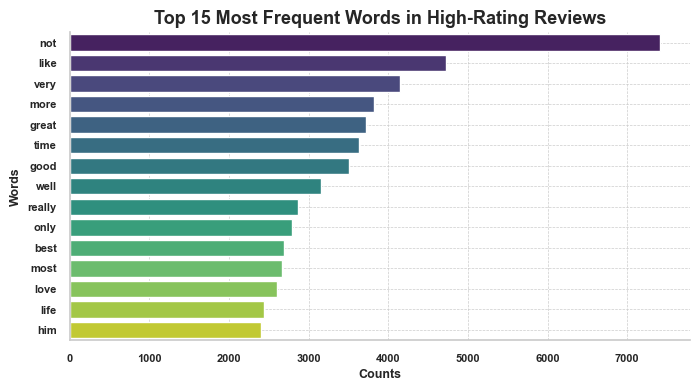

In [117]:
# Extract the top 15 most frequent words and their counts
top_high_rating_words = sorted_high_rating_word_count[:15]
high_rating_words, high_rating_counts = zip(*top_high_rating_words)
plot_word_counts(high_rating_words, high_rating_counts, 'Top 15 Most Frequent Words in High-Rating Reviews')

### Glove Embedding Analysis

In [136]:
import gensim.downloader as api
# Load pre-trained GloVe embeddings
print('Loading pre-trained GloVe embeddings...')
glove_vectors = api.load('glove-wiki-gigaword-50')

# Convert text data to numerical features using GloVe embeddings
def get_glove_features(data):
    features = []
    for text in data:
        words = text.lower().split()
        word_vectors = [glove_vectors[word] for word in words if word in glove_vectors and word not in fill_words_set]
        if len(word_vectors) > 0:
            text_vector = np.mean(word_vectors, axis=0)
        else:
            text_vector = np.zeros(50)
        features.append(text_vector)
    return np.array(features)

train_features = get_glove_features(train_reviews)
test_features = get_glove_features(test_reviews)

Loading pre-trained GloVe embeddings...


In [137]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

all_features = np.vstack((train_features, test_features))
# Perform PCA to reduce to 3 dimensions
pca = PCA(n_components=3)
all_features_3d = pca.fit_transform(all_features)

# Split back into train and test sets
train_features_3d = all_features_3d[:len(train_reviews)]
test_features_3d = all_features_3d[len(train_reviews):]

In [138]:
high_threshold = 8
low_threshold = 3
low_ratings_train = [i for i, rating in enumerate(train_ratings) if rating <= low_threshold]
high_ratings_train = [i for i, rating in enumerate(train_ratings) if rating >= high_threshold]

low_ratings_test = [i for i, rating in enumerate(test_ratings) if rating <= low_threshold]
high_ratings_test = [i for i, rating in enumerate(test_ratings) if rating >= high_threshold]


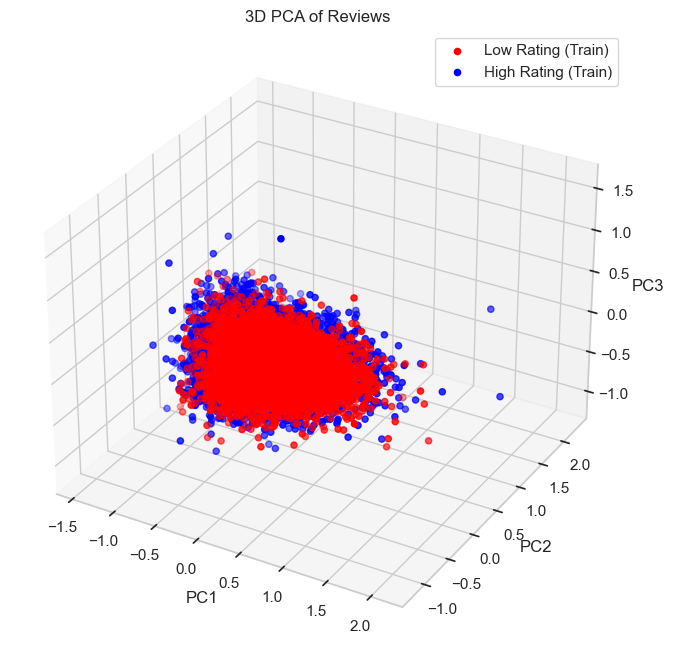

In [139]:
# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot low rating reviews (in red)
ax.scatter(train_features_3d[low_ratings_train, 0], train_features_3d[low_ratings_train, 1], train_features_3d[low_ratings_train, 2], c='red', label='Low Rating (Train)')
#ax.scatter(test_features_3d[low_ratings_test, 0], test_features_3d[low_ratings_test, 1], test_features_3d[low_ratings_test, 2], c='darkred', label='Low Rating (Test)')

# Plot high rating reviews (in blue)
ax.scatter(train_features_3d[high_ratings_train, 0], train_features_3d[high_ratings_train, 1], train_features_3d[high_ratings_train, 2], c='blue', label='High Rating (Train)')
#ax.scatter(test_features_3d[high_ratings_test, 0], test_features_3d[high_ratings_test, 1], test_features_3d[high_ratings_test, 2], c='darkblue', label='High Rating (Test)')

# Set plot labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA of Reviews')

# Add legend
ax.legend()

# Show plot
plt.show()

In [130]:
!pip install plotly

In [140]:
import plotly.express as px
import plotly.graph_objs as go

# Prepare data for plotting
train_low_3d = train_features_3d[low_ratings_train]
train_high_3d = train_features_3d[high_ratings_train]
test_low_3d = test_features_3d[low_ratings_test]
test_high_3d = test_features_3d[high_ratings_test]

# Create 3D scatter plot using plotly
fig = go.Figure()

# Add training low ratings
fig.add_trace(go.Scatter3d(
    x=train_low_3d[:, 0], y=train_low_3d[:, 1], z=train_low_3d[:, 2],
    mode='markers',
    marker=dict(size=5, color='red'),
    name='Low Rating (Train)'
))

# Add training high ratings
fig.add_trace(go.Scatter3d(
    x=train_high_3d[:, 0], y=train_high_3d[:, 1], z=train_high_3d[:, 2],
    mode='markers',
    marker=dict(size=5, color='blue'),
    name='High Rating (Train)'
))


# Set plot layout
fig.update_layout(
    title='3D PCA of Reviews',
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='PC3'
    ),
    legend=dict(x=0, y=1)
)

# Show plot
fig.show()